In [120]:
samples = replicate(rnorm(100), n=5)

[1] "Intervals:"


lower,-2.3387362,-1.154966,0.6414915,-1.4985689,-1.1374287,-1.012491,-1.983277,-1.5219185,-1.835055,-1.043349,⋯,-1.633779,-0.7350683,-2.289301,-1.495890,-0.9992331,-0.3835530,-1.4132768,-1.301529,-0.7484597,-1.066974
upper,0.8579028,1.094513,1.7664468,0.4645142,0.8383988,1.345626,2.117113,0.1813404,1.225670,1.353329,⋯,1.974872,0.8602421,1.089987,1.560084,1.0803568,0.9642565,0.2037518,1.505739,1.0992311,1.297403


[1] "Fraction mu=0 in interval:"


[1] 0.96

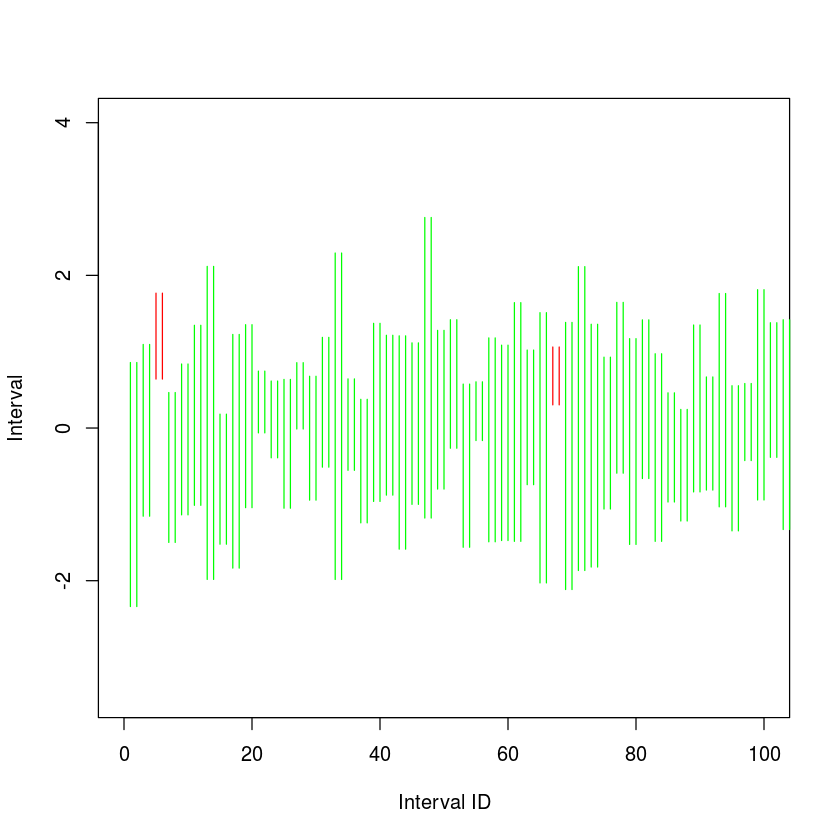

In [124]:
output <- matrix(unlist(samples), ncol = 5, byrow = TRUE)
# Assume sample distributed ~ t(n-1)

one_row <- function(row) {
    mu = mean(row)
    summed = sum((row-mu)^2)
    s = sqrt(1 / (length(row) - 1) * summed)
    t_quant = qt(0.975, length(row) - 1)
    c(lower=mu - t_quant * s / sqrt(length(row)), upper=mu + t_quant * s / sqrt(length(row)))
}

intervals = apply(output, 1, one_row)

count <- function(interval) {
    low = interval["lower"]
    hi = interval["upper"]
    low <= 0 && hi >= 0
}

print("Intervals:")
intervals
print("Fraction mu=0 in interval:")

interval.plt <- function(intrvls) {
    zero_included <- apply(t(intrvls), 1, count)
    plot(1, type="n", xlab="Interval ID", ylab="Interval", xlim=c(0, length(intrvls[1,])), ylim=c(min(intrvls) - 1, max(intrvls) + 1))
    apply(t(intrvls), 1, 
          function(intrvl) {
              idx = which(intrvls == intrvl)
              if (count(intrvl)) {
                  col = "green"
              } else {
                  col = "red"
              }
              segments(x0=idx, y0=intrvl["lower"], y1=intrvl["upper"], col=col)
          })
    sum(zero_included) / length(zero_included)
}

interval.plt(intervals)